<a href="https://colab.research.google.com/github/nalsadi/ME736_Dev/blob/main/A3_Q8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 Question 8

Example Solution

Naseem



##  Library Import

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random

## Data Import 

In [ ]:
capital_data = np.genfromtxt('data.csv', delimiter=',')
capital_data = [i[1] for i in capital_data[1:]]

In [ ]:
fig = go.Figure(data=go.Scatter(y=capital_data))
fig.show()

## Q Learning

### Define Actions

In [ ]:
def keep_on(capital, money):
    return money + capital


def keep_off(capital, money):
    return money 


### Create Q Table

In [ ]:
#np.random.seed(0)

# set of actions that the user could do
actions = { 'keep_on' : keep_on, 'keep_off': keep_off}

actions_to_nr = { 'keep_on' : 0, 'keep_off': 1}
nr_to_actions = { k:v for (k,v) in enumerate(actions_to_nr) }

nr_actions = len(actions_to_nr.keys())
nr_states = len(capital_data)

# q-table = reference table for our agent to select the best action based on the q-value
q_table = np.zeros([nr_states, nr_actions])
q_table.shape

(101, 2)

### Defining Functions for Learning Process 

In [ ]:
# Define rewards
## Numerous ways you can define this: 

def get_reward(before_money, money):
    reward = 0
    #if(before_money == money):
     #   reward = 1

    if(not before_money > money):
        reward =  1
    return reward

In [ ]:
# Define the process for choosing an action

def choose_action(state):
    if np.random.uniform(0, 1) < eps:
        rq =  random.choice([0, 1])#np.random.randint(0, 1)
        return rq
    else:
        return np.argmax(q_table[state])


In [ ]:

def take_action(state, action):
    return actions[nr_to_actions[action]](capital_data[state], money)


In [ ]:

def act(state, action, theta):
    money = theta
    
    done = False
    new_state = state + 1
    
    before_money = money
    money = take_action(state, action)
    theta = money
    
    reward = get_reward(before_money, money)
    
    if(new_state == nr_states):
        done = True
    
    return new_state, reward, theta, done

## Learning Process

In [ ]:
# Define hyperparameters
reward = 0
money = 0

theta = money

In [ ]:
# exploratory
eps = 0.1

n_episodes = 900
min_alpha = 0.1

# learning rate for Q learning
alphas = np.linspace(1.0, min_alpha, n_episodes)

# discount factor, used to balance immediate and future reward
gamma = 1.0

#### Steps for Q-network learning

Here are the 3 basic steps:

- Agent starts in a state=0 takes an action and receives a reward
- Agent selects action by referencing Q-table with highest value (max) OR by random (epsilon, ε)
- Update q-values

In [ ]:
# Define the learning process

rewards = {}
actionsw = []

for e in range(n_episodes):
    
    total_reward = 0
    
    state = 0
    done = False
    alpha = alphas[e]
    
    while(done != True):

        action = choose_action(state)
        next_state, reward, theta, done = act(state, action, theta)
        
        total_reward += reward
        
        if(done):
            rewards[e] = total_reward
            print(f"Episode {e + 1}: total reward -> {total_reward}")
            break
        
        q_table[state][action] = q_table[state][action] + alpha * (reward + gamma *  np.max(q_table[next_state]) - q_table[state][action])
        
        

        actionsw.append(action)
        state = next_state

Episode 1: total reward -> 51
Episode 2: total reward -> 49
Episode 3: total reward -> 49
Episode 4: total reward -> 48
Episode 5: total reward -> 48
Episode 6: total reward -> 51
Episode 7: total reward -> 52
Episode 8: total reward -> 51
Episode 9: total reward -> 52
Episode 10: total reward -> 53
Episode 11: total reward -> 53
Episode 12: total reward -> 51
Episode 13: total reward -> 53
Episode 14: total reward -> 56
Episode 15: total reward -> 60
Episode 16: total reward -> 57
Episode 17: total reward -> 58
Episode 18: total reward -> 58
Episode 19: total reward -> 58
Episode 20: total reward -> 60
Episode 21: total reward -> 58
Episode 22: total reward -> 61
Episode 23: total reward -> 62
Episode 24: total reward -> 62
Episode 25: total reward -> 64
Episode 26: total reward -> 63
Episode 27: total reward -> 61
Episode 28: total reward -> 64
Episode 29: total reward -> 64
Episode 30: total reward -> 62
Episode 31: total reward -> 64
Episode 32: total reward -> 66
Episode 33: total

## Analyzing Results

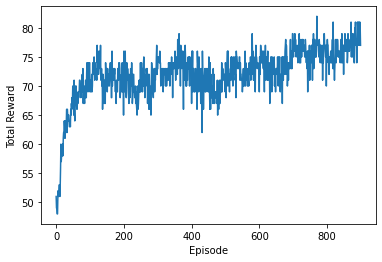

In [ ]:
# Analyze the rewards over the episodes
plt.ylabel('Total Reward')
plt.xlabel('Episode')
plt.plot([rewards[e] for e in rewards.keys()])
plt.show()

## Plot the Results

In [ ]:
# Visualize the results
state = 0
acts = np.zeros(nr_states)
done = False

while(done != True):

        action = choose_action(state)
        next_state, reward, theta, done = act(state, action, theta)
        
        acts[state] = action
        
        total_reward += reward
        
        if(done):
            break
            
        state = next_state

In [ ]:
keep_on_idx = np.where(acts == 0)
keep_off_idx = np.where(acts == 1)


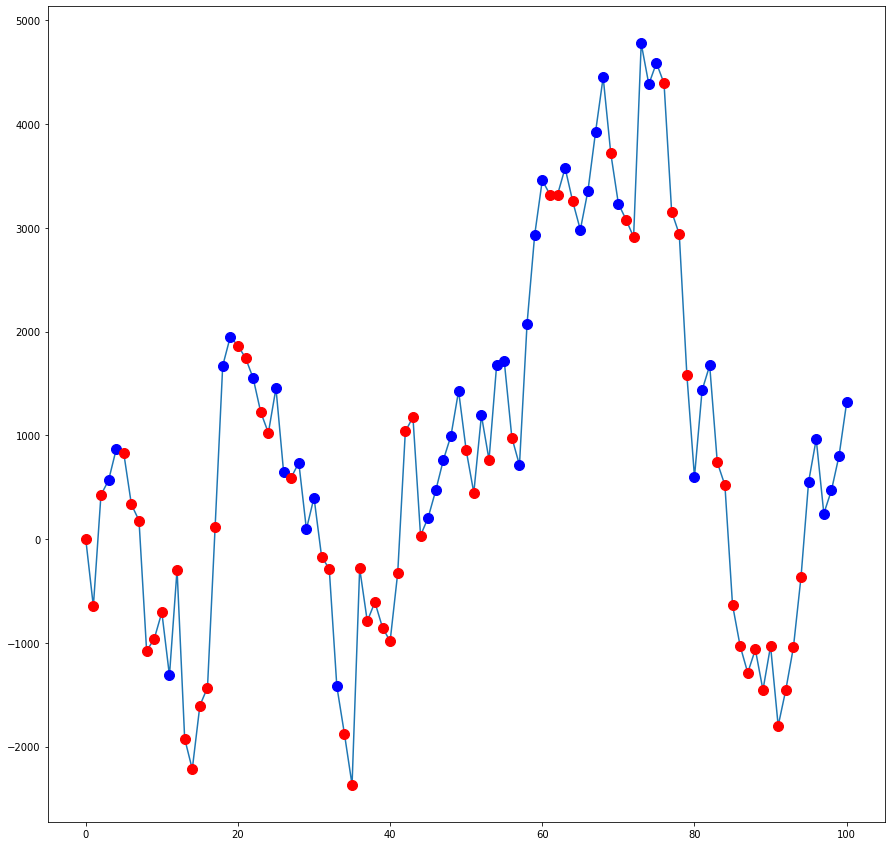

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(capital_data)

plt.plot(keep_on_idx[0], [capital_data[i] for i in keep_on_idx[0]], 'bo', markersize=10)
plt.plot(keep_off_idx[0], [capital_data[i] for i in keep_off_idx[0]], 'ro', markersize=10)
plt.show()